In [6]:
import tensorflow as tf
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [7]:
x_train_ = pd.read_csv('fashion-mnist_train.csv', sep=',')
x_test_ = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [10]:
x_train_.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_test_.shape

(10000, 785)

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
x_train_ = np.asarray(x_train_, dtype='float32')
x_test_ = np.asarray(x_test_, dtype='float32')

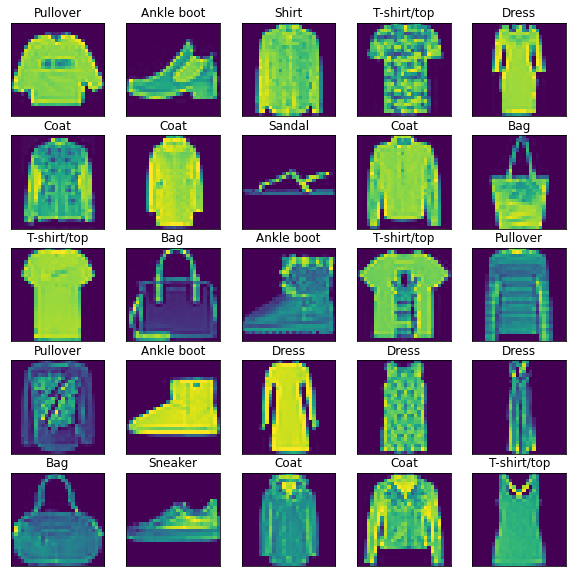

In [17]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_[i, 1:].reshape(28,28))
    label_index = int(x_train_[i, 0])
    plt.title(class_names[label_index])
plt.show()

In [18]:
x_train = x_train_[:, 1:].reshape(-1, 28, 28, 1)
x_test = x_test_[:, 1:].reshape(-1, 28, 28, 1)

In [19]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [20]:
y_train = x_train_[:, 0]
y_test = x_test_[:, 0]

In [21]:
y_test.shape

(10000,)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.4035 - accuracy: 0.8549 - val_loss: 0.2865 - val_accuracy: 0.8951
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2645 - accuracy: 0.9039 - val_loss: 0.2539 - val_accuracy: 0.9074
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2177 - accuracy: 0.9202 - val_loss: 0.2149 - val_accuracy: 0.9218
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1846 - accuracy: 0.9319 - val_loss: 0.2079 - val_accuracy: 0.9244
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1586 - accuracy: 0.9411 - val_loss: 0.2044 - val_accuracy: 0.9287
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1316 - accuracy: 0.9505 - val_loss: 0.2035 - val_accuracy: 0.9307
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1123 - accuracy: 0.9580 - val_loss: 0.2106 -

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.2876 - accuracy: 0.9284

Test loss: 0.287643164396286

Test accuracy: 0.9283999800682068


In [26]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 2s 5ms/step


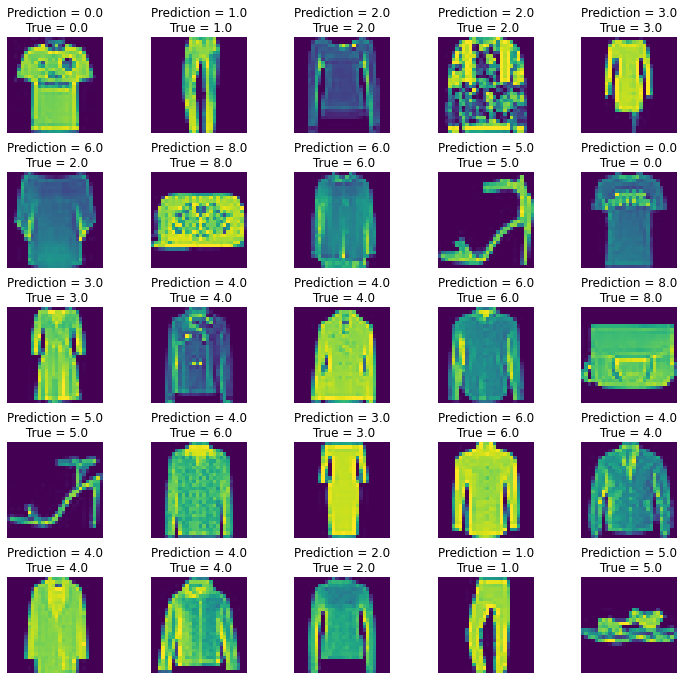

In [27]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"Prediction = {(predicted_classes[i]):0.1f}\n True = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)